Dataset: https://data.cityofnewyork.us/City-Government/Jobs-NYC-Postings/kpav-sd4t/about_data

The selected Dataset contains 2 numeric fields and one categorical field at minimum. For example, JobId and salaryRangeFrom are numerical while job_category is categorical field.

## Part 1: Introduction – A brief summary of the type of data you’ve chosen to work with and the research question you hope to answer with it.

### Summary:
The dataset contains information about job postings in New York City. Some key attributes include Job ID, Agency, Posting Type, Number of Positions, Business Title, Civil Service Title, Salary Range, Work Location, Job Description, Minimum Qual Requirements, Preferred Skills, and various other details related to job postings. The dataset provides information about different job categories, salary ranges, and other relevant details for analysis. 

### Research Questions:
1. how does the demand change over time for particular employment roles in New York City?
2. Which industries and boroughs have the most varied job posting trends in New York City over the last five years?
3. What is the distribution of job postings in New York City across different agencies?

## Part 2: Data Summary – Explain where you acquired your data from; how many use cases your data set provides; how many attributes are in each use case; what the data types are for each of the attributes; etc. Be sure to include any Python code used as part of your Data Summary work.

The data set is acquired from NYC Open Data's website  https://data.cityofnewyork.us/City-Government/Jobs-NYC-Postings/kpav-sd4t/about_data,
This data set can provide several use cases, some of which are mentioned below, 

1. Exploration of agency-wise distribution of job postings. (Attributes: Agency, Posting Type, # of Positions, Business Title, Job Category, Full-Time/Part-Time Indicator, Career Level, Salary Range From, Salary Range To, Work Location, Division/Work Unit, Job Description, Minimum Qual Requirements, Preferred Skills, Additional Information, To Apply, Recruitment Contact, Residency Requirement, Posting Date, Post Until, Posting Updated, Process Date.)
2. Analysis of job categories and identify popular ones. (Attributes: Job Category, # of Positions, Business Title, Full-Time/Part-Time Indicator, Career Level, Salary Range From, Salary Range To, Work Location, Division/Work Unit, Job Description, Minimum Qual Requirements, Preferred Skills, Additional Information, To Apply, Recruitment Contact, Residency Requirement, Posting Date, Post Until, Posting Updated, Process Date.)
3. Investigation of salary ranges and compare across career levels. (Attributes: Career Level, Salary Range From, Salary Range To.)
4. Examination of the geographic concentration of job opportunities. (Attributes: Work Location, Division/Work Unit)
8. Identification of key contacts for recruitment within agencies. (Attributes: Recruitment Contact.)
9. Understanding residency requirements for different positions. (Attributes: Residency Requirement.) etc



In [2]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/justsumant/DAV-5400/main/Jobs_NYC_Postings_20240219.csv"
df = pd.read_csv(url)

# Display basic information about the dataset
print("Number of rows and columns:", df.shape)

# Display data types of each attribute
print("\nColumn names and data types:")
print(df.dtypes)

# Display basic statistics for numerical columns
print("\nBasic statistics for numerical columns:")
print(df.describe())


Number of rows and columns: (3796, 30)

Column names and data types:
Job ID                             int64
Agency                            object
Posting Type                      object
# Of Positions                     int64
Business Title                    object
Civil Service Title               object
Title Classification              object
Title Code No                     object
Level                             object
Job Category                      object
Full-Time/Part-Time indicator     object
Career Level                      object
Salary Range From                float64
Salary Range To                  float64
Salary Frequency                  object
Work Location                     object
Division/Work Unit                object
Job Description                   object
Minimum Qual Requirements         object
Preferred Skills                  object
Additional Information            object
To Apply                          object
Hours/Shift                  

## Part 3: Exploratory Data Analysis (EDA)–Provide summary statistics for each attribute; provide appropriate graphical analysis for each attribute using both Matplotlib and Seaborn. For example, if you believe it is appropriate to generate a histogram for a particular variable as part of your EDA, create it first using Matplotlib and then once again using Seaborn. Include a narrative describing your EDA findings.Be sure include any Python code used as part of your EDA work.


In [3]:
# Provide summary statistics for each attribute
summary_statistics = df.describe(include='all')

# Print the results
print(summary_statistics)


               Job ID                          Agency Posting Type  \
count     3796.000000                            3796         3796   
unique            NaN                              60            2   
top               NaN  DEPT OF ENVIRONMENT PROTECTION     Internal   
freq              NaN                             674         1932   
mean    597934.270285                             NaN          NaN   
std      27184.674332                             NaN          NaN   
min     469953.000000                             NaN          NaN   
25%     588488.500000                             NaN          NaN   
50%     606412.000000                             NaN          NaN   
75%     618228.000000                             NaN          NaN   
max     626782.000000                             NaN          NaN   

        # Of Positions       Business Title    Civil Service Title  \
count      3796.000000                 3796                   3796   
unique             

According to our analysis, followings are the best suitable attributes to perform initial analysis, 
1. Posting Type: Visualize the distribution of Internal and External job postings.
2. Job Category: Explore the distribution of job categories across different occupational groups.
3. Full-Time/Part-Time Indicator: Understand the distribution of job types (full-time or part-time).
4. Career Level: Analyze the distribution of job postings across different career levels.

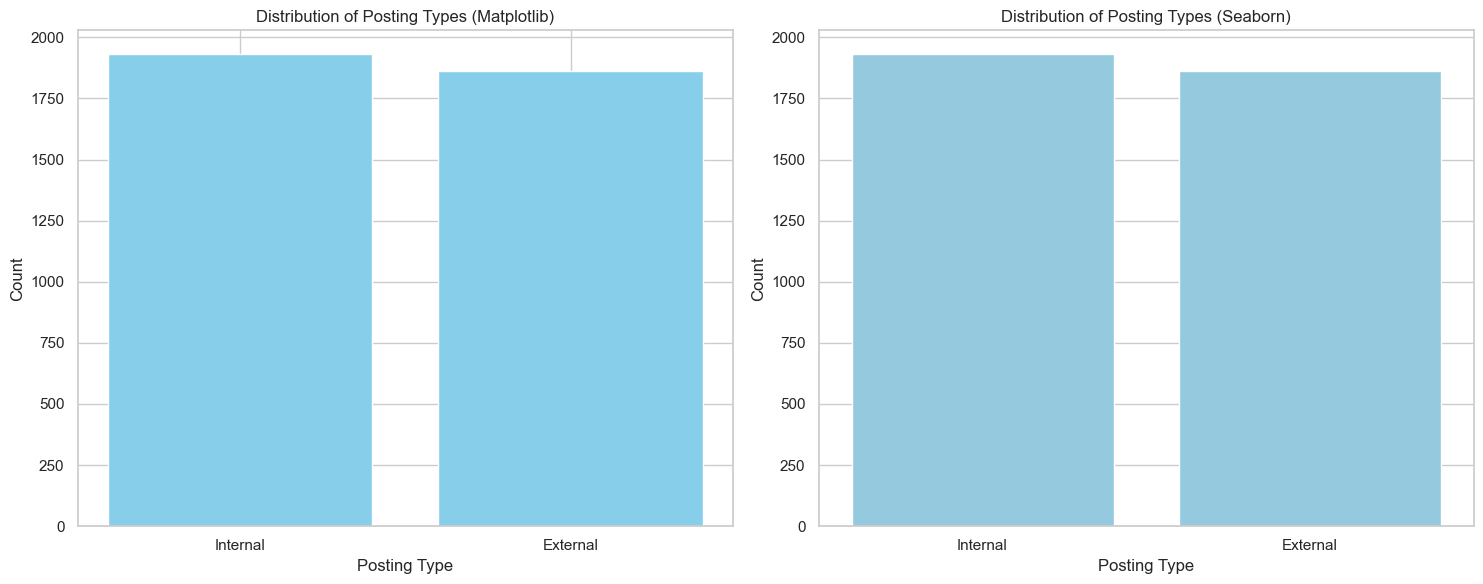

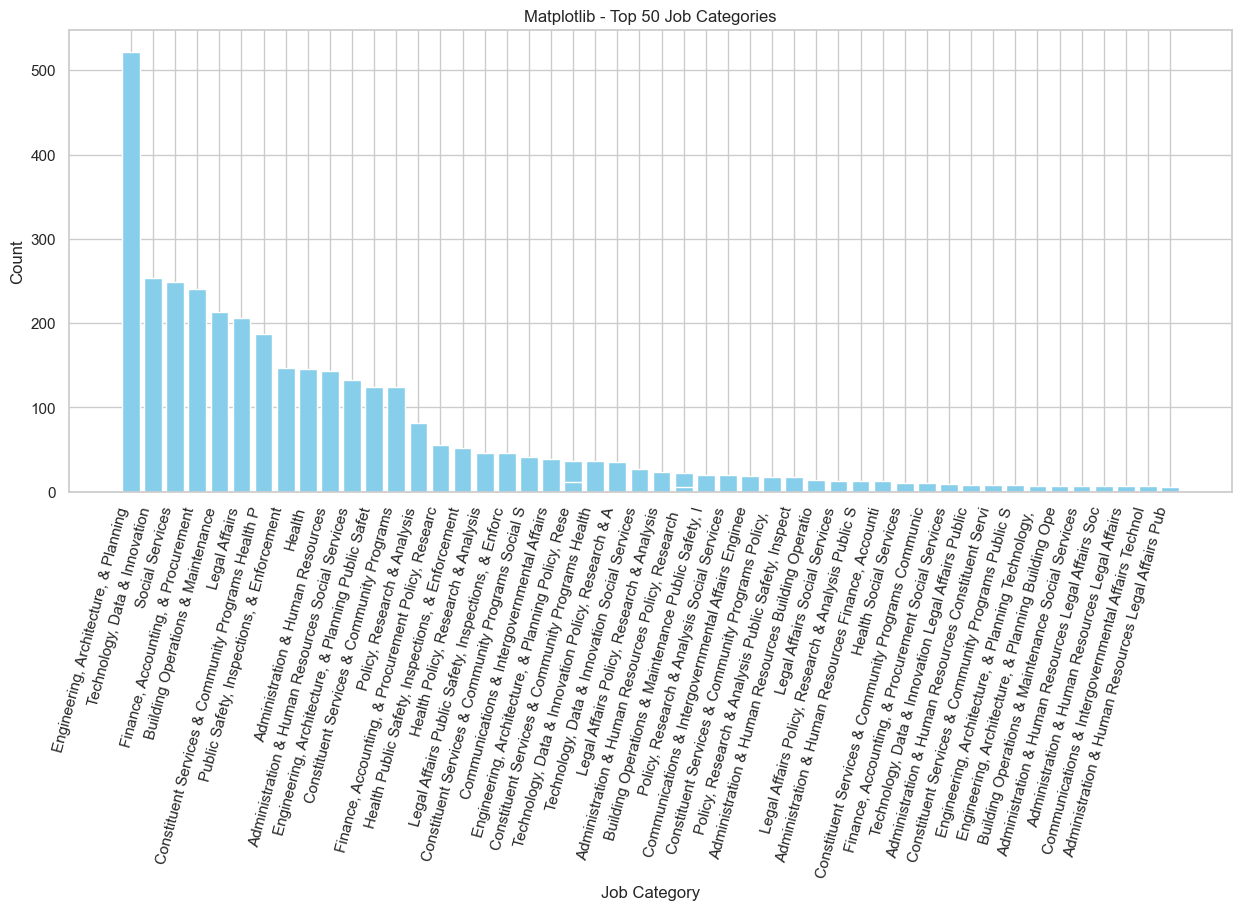

/Users/sumantgupta/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


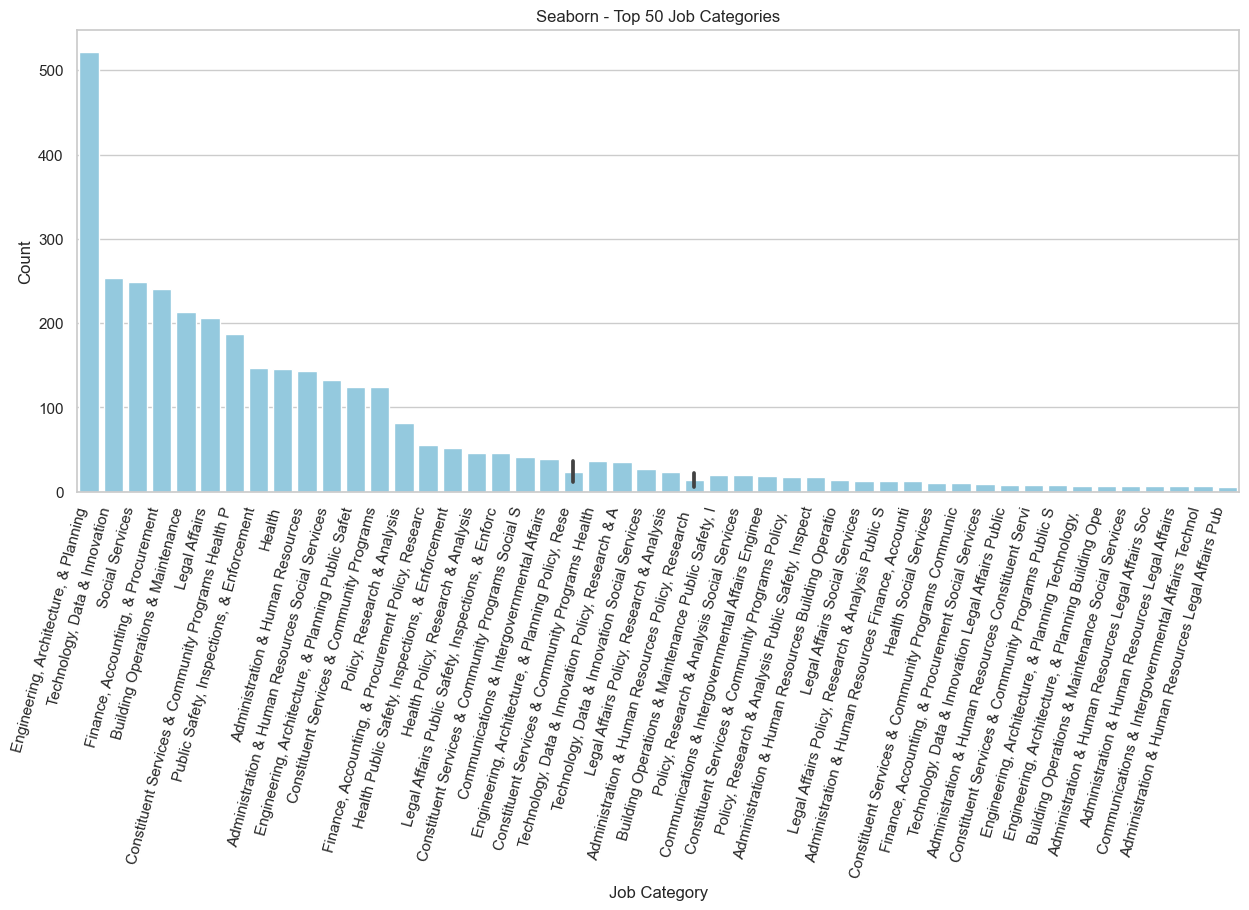

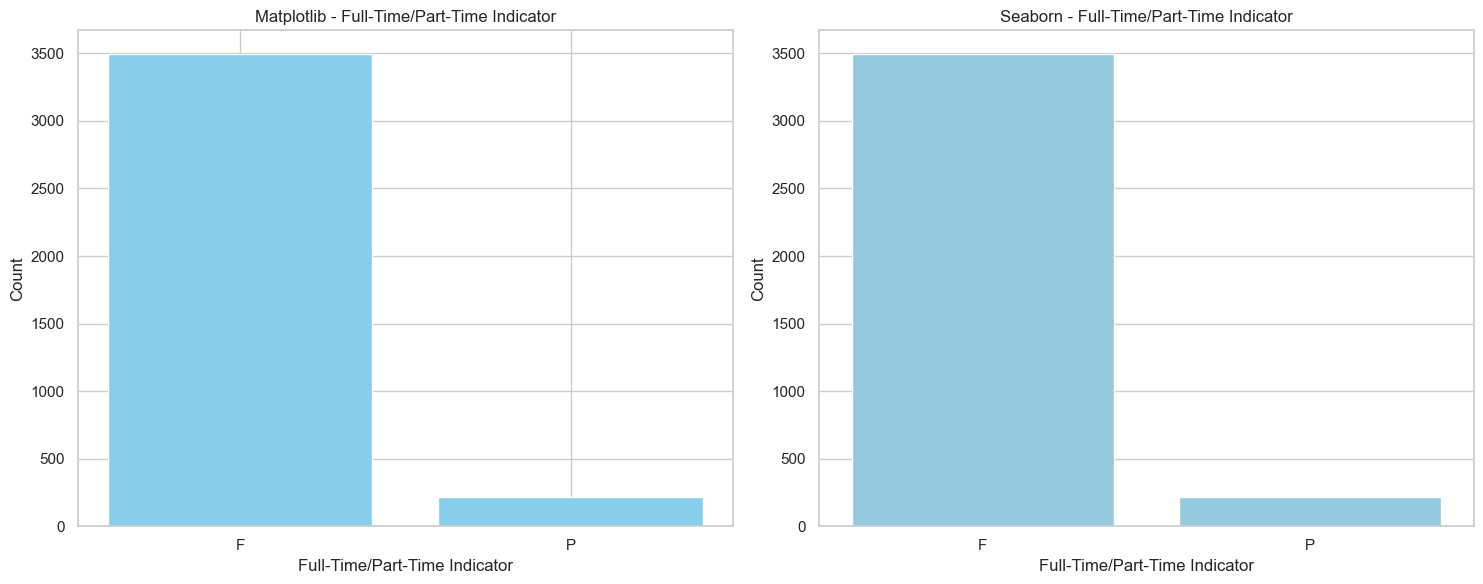

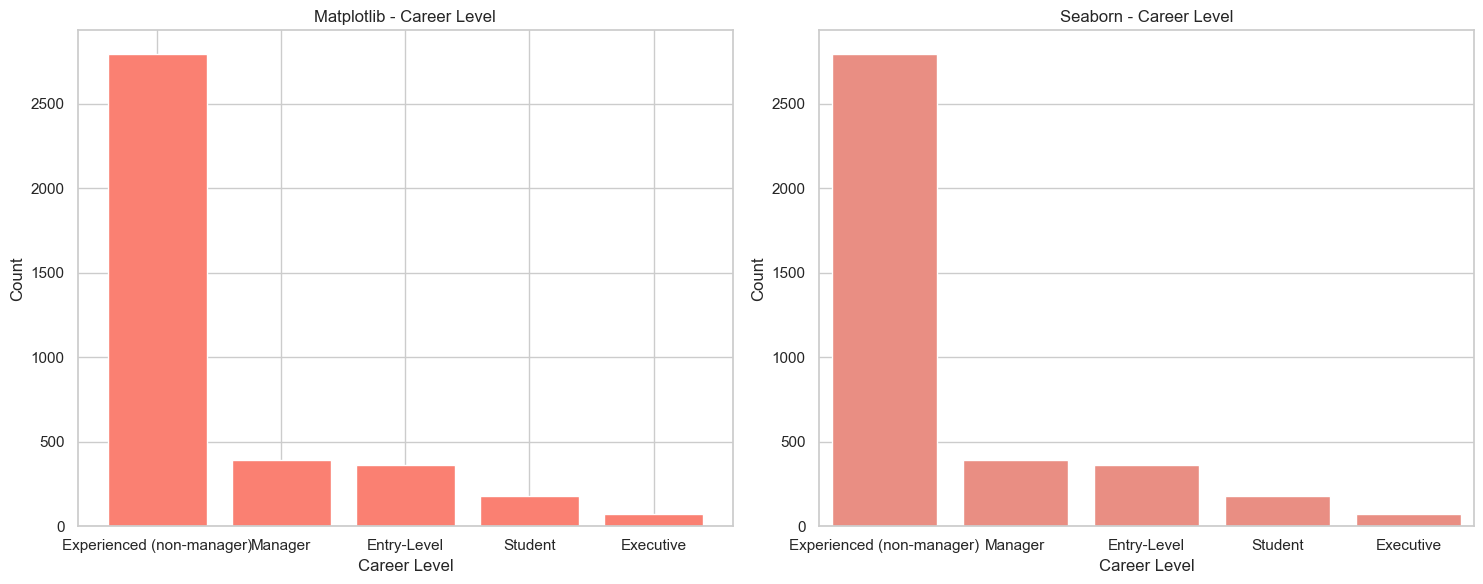

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for Seaborn
sns.set(style="whitegrid")

# Example for Posting Type
posting_type_counts = df['Posting Type'].value_counts()

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plotting bar chart using Matplotlib
axes[0].bar(posting_type_counts.index, posting_type_counts.values, color='skyblue')
axes[0].set_title('Distribution of Posting Types (Matplotlib)')
axes[0].set_xlabel('Posting Type')
axes[0].set_ylabel('Count')

# Plotting bar chart using Seaborn
sns.barplot(x=posting_type_counts.index, y=posting_type_counts.values, color='skyblue', ax=axes[1])
axes[1].set_title('Distribution of Posting Types (Seaborn)')
axes[1].set_xlabel('Posting Type')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# ------------------------------------------------------------------------------------------------------------------------------

# Example for Job Category
job_category_counts = df['Job Category'].value_counts()

# # Matplotlib plot
# plt.figure(figsize=(10, 6))
# plt.bar(job_category_counts.index, job_category_counts.values, color='skyblue')
# plt.title('Matplotlib - Job Category')
# plt.xlabel('Job Category')
# plt.ylabel('Count')
# plt.xticks(rotation=45, ha='right')
# plt.show()

# # Seaborn plot
# plt.figure(figsize=(10, 6))
# sns.barplot(x=job_category_counts.index, y=job_category_counts.values, color='skyblue')
# plt.title('Seaborn - Job Category')
# plt.xlabel('Job Category')
# plt.ylabel('Count')
# plt.xticks(rotation=45, ha='right')
# plt.show()

# Example for Job Category
top_job_categories = df['Job Category'].value_counts().nlargest(50)

# Truncate labels to 100 characters
truncated_labels = [label[:50] for label in top_job_categories.index]

# Matplotlib plot
plt.figure(figsize=(15, 6))
plt.bar(truncated_labels, top_job_categories.values, color='skyblue')
# plt.bar(top_job_categories.index, top_job_categories.values, color='skyblue')
plt.title('Matplotlib - Top 50 Job Categories')
plt.xlabel('Job Category')
plt.ylabel('Count')
plt.xticks(rotation=75, ha='right')
plt.show()

# Seaborn plot
plt.figure(figsize=(15, 6))
sns.barplot(x=truncated_labels, y=top_job_categories.values, color='skyblue')
# sns.barplot(x=top_job_categories.index, y=top_job_categories.values, color='skyblue')
plt.title('Seaborn - Top 50 Job Categories')
plt.xlabel('Job Category')
plt.ylabel('Count')
plt.xticks(rotation=75, ha='right')
plt.show()


# ------------------------------------------------------------------------------------------------------------------------------
# Example for Full-Time/Part-Time Indicator
ft_pt_counts = df['Full-Time/Part-Time indicator'].value_counts()

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Matplotlib plot
axes[0].bar(ft_pt_counts.index, ft_pt_counts.values, color='skyblue')
axes[0].set_title('Matplotlib - Full-Time/Part-Time Indicator')
axes[0].set_xlabel('Full-Time/Part-Time Indicator')
axes[0].set_ylabel('Count')

# Seaborn plot
sns.barplot(x=ft_pt_counts.index, y=ft_pt_counts.values, color='skyblue', ax=axes[1])
axes[1].set_title('Seaborn - Full-Time/Part-Time Indicator')
axes[1].set_xlabel('Full-Time/Part-Time Indicator')
axes[1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------------------------------------------------------------------

# Example for Career Level
career_level_counts = df['Career Level'].value_counts()

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Matplotlib plot
axes[0].bar(career_level_counts.index, career_level_counts.values, color='salmon')
axes[0].set_title('Matplotlib - Career Level')
axes[0].set_xlabel('Career Level')
axes[0].set_ylabel('Count')

# Seaborn plot
sns.barplot(x=career_level_counts.index, y=career_level_counts.values, color='salmon', ax=axes[1])
axes[1].set_title('Seaborn - Career Level')
axes[1].set_xlabel('Career Level')
axes[1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()